In [10]:
%matplotlib notebook

In [17]:

def mandelbrot(x, y, threshold):
    
    """Calculates whether the number c = x + i*y belongs to the 
    Mandelbrot set. In order to belong, the sequence z[i + 1] = z[i]**2 + c
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[i+1] is greater than 4.
    """
    
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

<IPython.core.display.Javascript object>


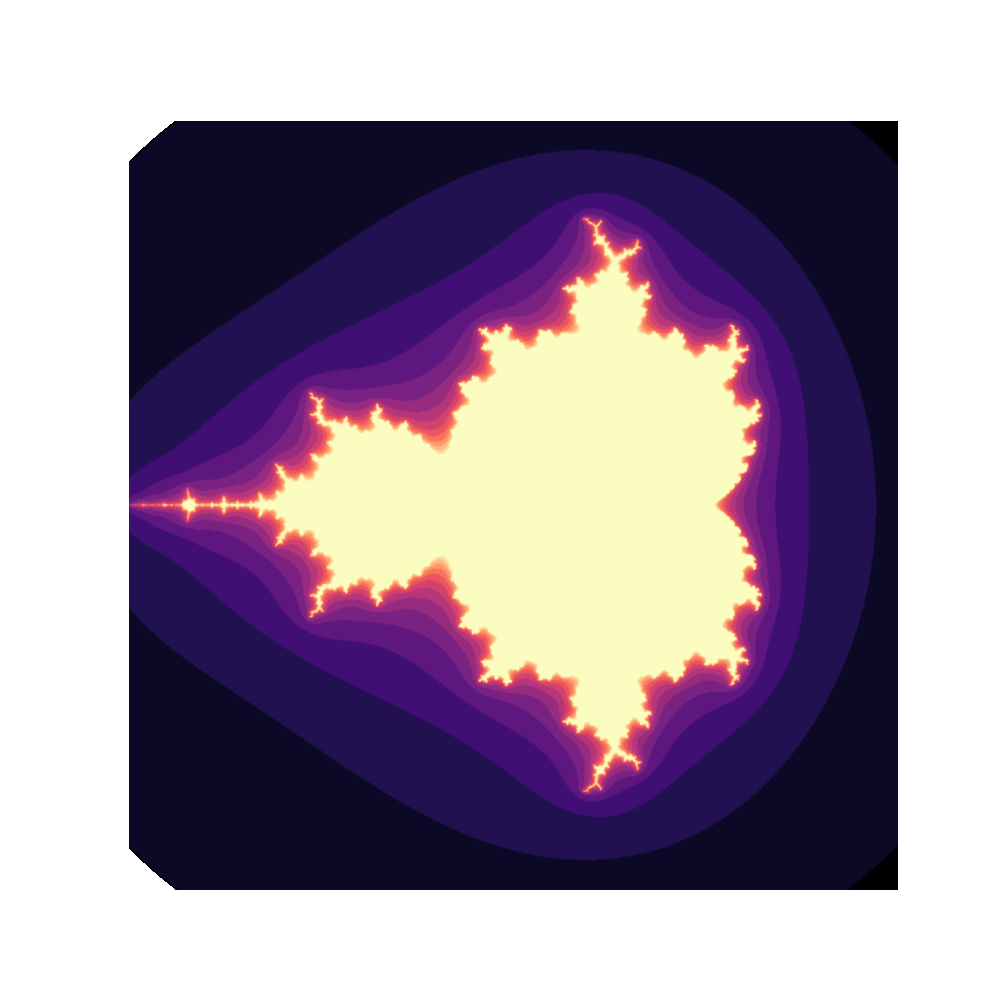

1
1
1
2
2
2
2
3
3
4
4
5
5
6
7
8
9
11
12
14
16
19
22
25
29
33
38
44
50
58
66
76
88
101
116
133
153
176
203
233
268
308
354
407
468
539


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_start, y_start = -2, -1.5  
width, height = 3, 3
density_per_unit = 250  

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([])  # clear x-axis 
    ax.set_yticks([])  # clear y-axis
    
    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold
    print(threshold)
    # iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    # associate colors to the iterations with an iterpolation
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]
 
anim = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
anim.save('mandelbrot.gif')


In [35]:
def julia_quadratic(zx, zy, cx, cy, threshold):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y
    belongs to the Julia set. In order to belong, the sequence 
    z[i + 1] = z[i]**2 + c, must not diverge after 'threshold' number of steps.
    The sequence diverges if the absolute value of z[i+1] is greater than 4.
    """
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

In [ ]:

x_start, y_start = -2, -2
width, height = 4, 4  # for 4 units up and right
density_per_unit = 200  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)


threshold = 20  # max allowed iterations
frames = 100  # number of frames in the animation

# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = np.linspace(0, 2*np.pi, frames)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks
    
    X = np.empty((len(re), len(im)))  # the initial array-like image
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])  # the initial c number
    
    # iterations for the given threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(re[i], im[j], cx, cy, threshold)
    
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('julia_set.gif')
